In [1]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data

In [2]:
import numpy as np
import random
def generate_random_samples(numberofsamples):
    # numberofclusters = random.randint(1,10)
    numberofclusters = 3
    samples = np.zeros((numberofsamples, 151))
    for i in range(numberofsamples):
        # t random numbers between 0 and n
        samples[i][:150] = np.random.randint(0, numberofclusters, 150)
        samples[i][150] = numberofclusters
    return samples


samples = generate_random_samples(1000)
samples[10]

array([1., 2., 1., 1., 1., 1., 0., 1., 2., 1., 0., 1., 2., 0., 0., 1., 0.,
       1., 2., 0., 1., 1., 1., 0., 2., 1., 0., 2., 1., 2., 0., 1., 0., 0.,
       2., 2., 1., 1., 1., 1., 2., 2., 0., 0., 2., 0., 0., 1., 1., 0., 2.,
       2., 2., 1., 1., 0., 1., 2., 2., 2., 1., 1., 1., 1., 0., 2., 2., 0.,
       2., 1., 1., 1., 2., 2., 0., 0., 0., 2., 0., 2., 2., 1., 0., 0., 2.,
       2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 2., 0., 2., 2., 1.,
       2., 1., 0., 1., 0., 0., 0., 0., 2., 1., 2., 1., 1., 1., 2., 0., 1.,
       0., 2., 2., 2., 1., 2., 0., 2., 2., 2., 1., 2., 0., 0., 1., 1., 1.,
       2., 1., 0., 0., 1., 2., 0., 0., 2., 2., 0., 0., 2., 0., 3.])

In [3]:
def calculate_fitness(sample):
    t = int(sample[150])
    cluster = [[] for _ in range(t)]
    for i in range(0, 150):
        if int(sample[i]) >= t:
            print("error")  
            print(sample)
            print(int(sample[i]),i)    
        cluster[int(sample[i])].append(X[i])
    # sum of distances from cluster centers
    fitness = 0
    for i in range(t):
        cluster_center = np.mean(cluster[i], axis=0)
        for j in range(len(cluster[i])):
            fitness += np.linalg.norm(cluster_center - cluster[i][j])
    return fitness


In [4]:
def calculate_fitnesses(samples):
    fitnesses = []
    for i in range(len(samples)):
        fitnesses.append(calculate_fitness(samples[i]))
    return fitnesses
def select_nbests(samples, fitnesses, n):
    sorted_indices = sorted(range(len(fitnesses)), key=lambda k: fitnesses[k])
    sorted_samples = [samples[i] for i in sorted_indices]
    sorted_fitnesses = [fitnesses[i] for i in sorted_indices]
    return sorted_samples[:n], sorted_fitnesses[:n]



In [5]:

# def crossover(sample1, sample2):
#     t = int(sample1[150])
#     crossover_point = random.randint(0, 150)
#     child1 = np.zeros(151)
#     child2 = np.zeros(151)
#     child1[:crossover_point] = sample1[:crossover_point]
#     child1[crossover_point:] = sample2[crossover_point:]

#     child2[:crossover_point] = sample2[:crossover_point]
#     child2[crossover_point:] = sample1[crossover_point:]
#     child1[150] = t
#     return child1, child2

def crossover(sample1,sample2):
    t = int(sample1[150])
    child1 = np.zeros(151)
    child2 = np.zeros(151)
    for i in range(0,150):
        if random.randint(0,1) == 0:
            child1[i] = sample1[i]
            child2[i] = sample2[i]
        else:
            child1[i] = sample2[i]
            child2[i] = sample1[i]
    child1[150] = t
    child2[150] = t
    return child1, child2




def mutate(sample):

    # mutate probability 1/150
    random_number = random.randint(0, 100)
    if random_number > 40:
        return sample
    t = int(sample[150])
    mutation_point = random.randint(0, 149)
    sample[mutation_point] = random.randint(0, 2)
    return sample

In [6]:
# update samples with crossover (cross over random choose 20 parents) and mutation (50%)
def update(samples):
    # select 20 parents
    samplesl = list(samples) 
    for i in range(0, 150):
        parent1 = random.randint(0, len(samples)-1)
        parent2 = random.randint(0, len(samples)-1)
        child1, child2 = crossover(samples[parent1], samples[parent2])
        # mutation
        child1 = mutate(child1)
        child2 = mutate(child2)
        # append to samples
         # Convert samples to a Python list
        samplesl.append(child1)
        samplesl.append(child2)
    sampleso = np.array(samplesl)  # Convert samples back to a NumPy array
    
    return sampleso

In [7]:
# evolutionary algorithm for clustering 
samples = generate_random_samples(100)
for i in range(70):
    # generate random cluster centers
    
    
    # calculate fitness
    print(samples.shape)
    fitnesses = calculate_fitnesses(samples)
    
    # select best
    samples, fitnesses = select_nbests(samples, fitnesses, 50)
    
    # mutate and crossover
    samples = update(samples)
    
    # repeat
    print(i, min(fitnesses))



(100, 151)
0 281.0531353433707
(350, 151)
1 277.92542075027364
(350, 151)
2 271.3355221409825
(350, 151)
3 264.5370151009799
(350, 151)
4 250.34666715177443
(350, 151)
5 246.26499373195128
(350, 151)
6 239.74902297497144
(350, 151)
7 216.91074540369615
(350, 151)
8 209.16528084607415
(350, 151)
9 199.4669329307008
(350, 151)
10 183.91859761891058
(350, 151)
11 165.78007835520123
(350, 151)
12 155.49381423356078
(350, 151)
13 151.08734961814397
(350, 151)
14 143.771938614348
(350, 151)
15 134.81748692714
(350, 151)
16 131.9093705991031
(350, 151)
17 127.5202485752257
(350, 151)
18 126.72031533659539
(350, 151)
19 126.72031533659539
(350, 151)
20 125.16990853017654
(350, 151)
21 125.16990853017654
(350, 151)
22 123.00347657071553
(350, 151)
23 122.6685238795282
(350, 151)
24 121.52300700946078
(350, 151)
25 119.10974906810016
(350, 151)
26 117.94128853566768
(350, 151)
27 115.6285914317351
(350, 151)
28 114.30651391480643
(350, 151)
29 111.65997200771609
(350, 151)
30 110.48652194118287


In [8]:
# find min fitness sample
fitnesses = calculate_fitnesses(samples)
    
# select best
samples, fitnesses = select_nbests(samples, fitnesses, 1)
    
print(samples[0],fitnesses)
best_sample = samples[0]

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 2.
 0. 2. 0. 2. 0. 0. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 2. 0.
 0. 0. 0. 0. 0. 2. 3.] [97.2003660827206]


Text(0.5, 1.0, 'target')

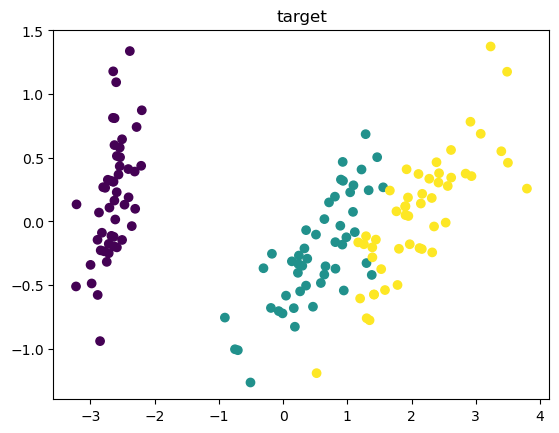

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
target = data.target
plt.scatter(X_r[:, 0], X_r[:, 1], c=target[:150])
plt.title('target')

Text(0.5, 1.0, 'best_sample')

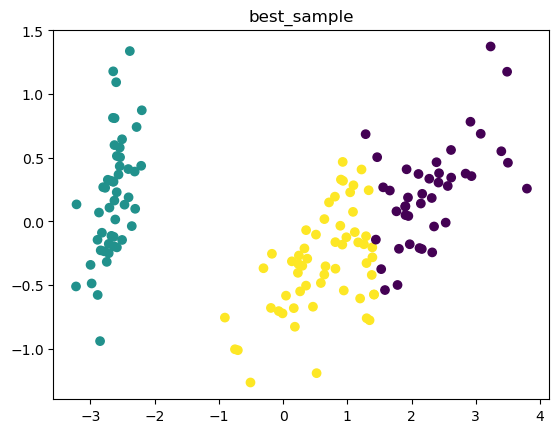

In [10]:


plt.scatter(X_r[:, 0], X_r[:, 1], c=best_sample[:150])
plt.title('best_sample')

c:\Users\COMPUTER SHAHR\anaconda3\envs\quera1\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\COMPUTER SHAHR\anaconda3\envs\quera1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Kmeans on Iris dataset')

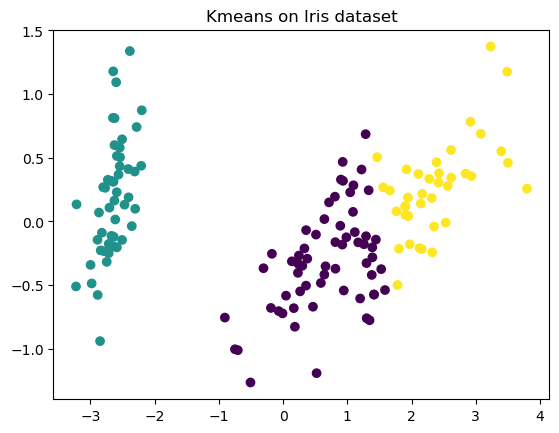

In [11]:
# kmeans on X 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
plt.scatter(X_r[:, 0], X_r[:, 1], c=kmeans.labels_[:150])
# put title for plot
plt.title('Kmeans on Iris dataset')